In [1]:
from influxdb_client import InfluxDBClient
import numpy as np
import seaborn as sns

In [2]:
# Verbindungsparameter
url = 'http://tig.influxdb.local' # A modification in /etc/hosts might be required
token = "securetoken"
org = "influxdata"
bucket = "default"

client = InfluxDBClient(url=url, token=token, org=org)
query_api = client.query_api()
query = f'''
from(bucket: "{bucket}") 
|> range(start: -8h)
|> filter(fn: (r) => r["_measurement"] == "http")
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
'''
dataframe = query_api.query_data_frame(query, org=org)

In [3]:

print("Database Query returned: " + str(len(dataframe)) + " elements!")
display('Type: ' + str(type(dataframe)), 'Dataframe Shape: ' + str(dataframe.shape), dataframe.head())

Database Query returned: 2879 elements!


"Type: <class 'pandas.core.frame.DataFrame'>"

'Dataframe Shape: (2879, 2924)'

,result,table,_start,_stop,_time,_measurement,host,url,10838_days_0_icon,10838_days_0_moonPhase,...,10840_forecast2_surfacePressure_51,10840_forecast2_surfacePressure_52,10840_forecast2_surfacePressure_53,10840_forecast2_surfacePressure_54,10840_forecast2_surfacePressure_55,10840_forecast2_surfacePressure_6,10840_forecast2_surfacePressure_7,10840_forecast2_surfacePressure_8,10840_forecast2_surfacePressure_9,10840_forecast2_timeStep
0,_result,0,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:05:50+00:00,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...,2.0,6.0,...,10127.0,10115.0,10112.0,10121.0,10135.0,10106.0,10115.0,10116.0,10117.0,10800000.0
1,_result,0,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:06:00+00:00,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...,2.0,6.0,...,10127.0,10115.0,10112.0,10121.0,10135.0,10106.0,10115.0,10116.0,10117.0,10800000.0
2,_result,0,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:06:10+00:00,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...,2.0,6.0,...,10127.0,10115.0,10112.0,10121.0,10135.0,10106.0,10115.0,10116.0,10117.0,10800000.0
3,_result,0,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:06:20+00:00,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...,2.0,6.0,...,10127.0,10115.0,10112.0,10121.0,10135.0,10106.0,10115.0,10116.0,10117.0,10800000.0
4,_result,0,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:06:30+00:00,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...,2.0,6.0,...,10127.0,10115.0,10112.0,10121.0,10135.0,10106.0,10115.0,10116.0,10117.0,10800000.0


In [4]:
dataframe = dataframe.interpolate() # TODO: use polymomial instead of the default linear interpolation
cols_to_drop = dataframe.columns[dataframe.columns.str.contains('forecast')]
dataframe.drop(cols_to_drop, axis=1, inplace=True)
print(dataframe.dtypes.value_counts())
display(dataframe.select_dtypes(include='float64').head(5))
display(dataframe.select_dtypes(include='object').head(5))
display(dataframe.select_dtypes(include='datetime64[ns, UTC]').head(5))
display(dataframe.select_dtypes(include='int64').head(5))

dataframe = dataframe.select_dtypes(include='float64')

float64                260
object                   4
datetime64[ns, UTC]      3
int64                    1
Name: count, dtype: int64


/tmp/ipykernel_201379/3905226762.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataframe = dataframe.interpolate() # TODO: use polymomial instead of the default linear interpolation


,10838_days_0_icon,10838_days_0_moonPhase,10838_days_0_moonrise,10838_days_0_moonset,10838_days_0_precipitation,10838_days_0_sunrise,10838_days_0_sunset,10838_days_0_sunshine,10838_days_0_temperatureMax,10838_days_0_temperatureMin,...,10840_days_9_moonset,10840_days_9_precipitation,10840_days_9_sunrise,10840_days_9_sunset,10840_days_9_sunshine,10840_days_9_temperatureMax,10840_days_9_temperatureMin,10840_days_9_windDirection,10840_days_9_windGust,10840_days_9_windSpeed
0,2.0,6.0,1.722205e+12,1.722171e+12,59.0,1.722139e+12,1.722193e+12,4610.0,229.0,174.0,...,1.722974e+12,0.0,1.722917e+12,1.722970e+12,4280.0,246.0,154.0,2380.0,278.0,111.0
1,2.0,6.0,1.722205e+12,1.722171e+12,59.0,1.722139e+12,1.722193e+12,4610.0,229.0,174.0,...,1.722974e+12,0.0,1.722917e+12,1.722970e+12,4280.0,246.0,154.0,2380.0,278.0,111.0
2,2.0,6.0,1.722205e+12,1.722171e+12,59.0,1.722139e+12,1.722193e+12,4610.0,229.0,174.0,...,1.722974e+12,0.0,1.722917e+12,1.722970e+12,4280.0,246.0,154.0,2380.0,278.0,111.0
3,2.0,6.0,1.722205e+12,1.722171e+12,59.0,1.722139e+12,1.722193e+12,4610.0,229.0,174.0,...,1.722974e+12,0.0,1.722917e+12,1.722970e+12,4280.0,246.0,154.0,2380.0,278.0,111.0
4,2.0,6.0,1.722205e+12,1.722171e+12,59.0,1.722139e+12,1.722193e+12,4610.0,229.0,174.0,...,1.722974e+12,0.0,1.722917e+12,1.722970e+12,4280.0,246.0,154.0,2380.0,278.0,111.0


,result,_measurement,host,url
0,_result,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...
1,_result,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...
2,_result,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...
3,_result,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...
4,_result,http,telegraf-polling-service,https://dwd.api.proxy.bund.dev/v30/stationOver...


,_start,_stop,_time
0,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:05:50+00:00
1,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:06:00+00:00
2,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:06:10+00:00
3,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:06:20+00:00
4,2024-07-28 11:05:47.618041+00:00,2024-07-28 19:05:47.618041+00:00,2024-07-28 11:06:30+00:00


,table
0,0
1,0
2,0
3,0
4,0


In [5]:
nan_or_zero_present = dataframe.isnull().values.any() or (dataframe == 0).values.any()
print("Are there any NaN or zero values in the DataFrame?")
print(nan_or_zero_present)

total_nan_or_zero_count = dataframe.isnull().sum().sum() + (dataframe == 0).sum().sum()
print("\nTotal number of NaN or zero values in the DataFrame:")
print(total_nan_or_zero_count)

Are there any NaN or zero values in the DataFrame?
True

Total number of NaN or zero values in the DataFrame:
56686


<class 'pandas.core.frame.DataFrame'>


,10838_days_0_icon,10838_days_0_moonPhase,10838_days_0_moonrise,10838_days_0_moonset,10838_days_0_precipitation,10838_days_0_sunrise,10838_days_0_sunset,10838_days_0_sunshine,10838_days_0_temperatureMax,10838_days_0_temperatureMin,...,10840_days_9_moonset,10840_days_9_precipitation,10840_days_9_sunrise,10840_days_9_sunset,10840_days_9_sunshine,10840_days_9_temperatureMax,10840_days_9_temperatureMin,10840_days_9_windDirection,10840_days_9_windGust,10840_days_9_windSpeed
10838_days_0_icon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838_days_0_moonPhase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838_days_0_moonrise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838_days_0_moonset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838_days_0_precipitation,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.915657,NaN,-0.075542,...,NaN,NaN,NaN,NaN,0.915657,-0.915657,0.915657,0.915657,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840_days_9_temperatureMax,NaN,NaN,NaN,NaN,-0.915657,NaN,NaN,1.000000,NaN,0.469982,...,NaN,NaN,NaN,NaN,-1.000000,1.000000,-1.000000,-1.000000,NaN,NaN
10840_days_9_temperatureMin,NaN,NaN,NaN,NaN,0.915657,NaN,NaN,-1.000000,NaN,-0.469982,...,NaN,NaN,NaN,NaN,1.000000,-1.000000,1.000000,1.000000,NaN,NaN
10840_days_9_windDirection,NaN,NaN,NaN,NaN,0.915657,NaN,NaN,-1.000000,NaN,-0.469982,...,NaN,NaN,NaN,NaN,1.000000,-1.000000,1.000000,1.000000,NaN,NaN
10840_days_9_windGust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

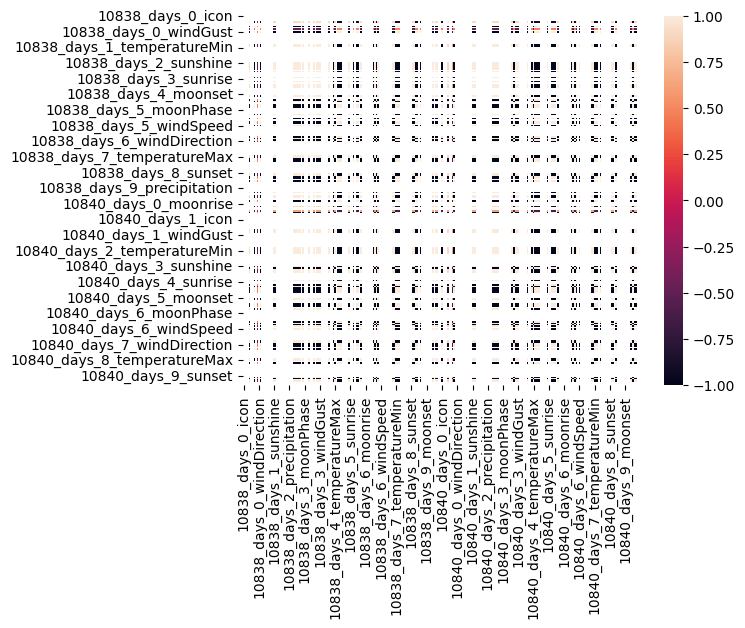

In [6]:
corr_matrix = dataframe.corr()
print(type(corr_matrix))
display(corr_matrix)
display(sns.heatmap(corr_matrix))

<Axes: >

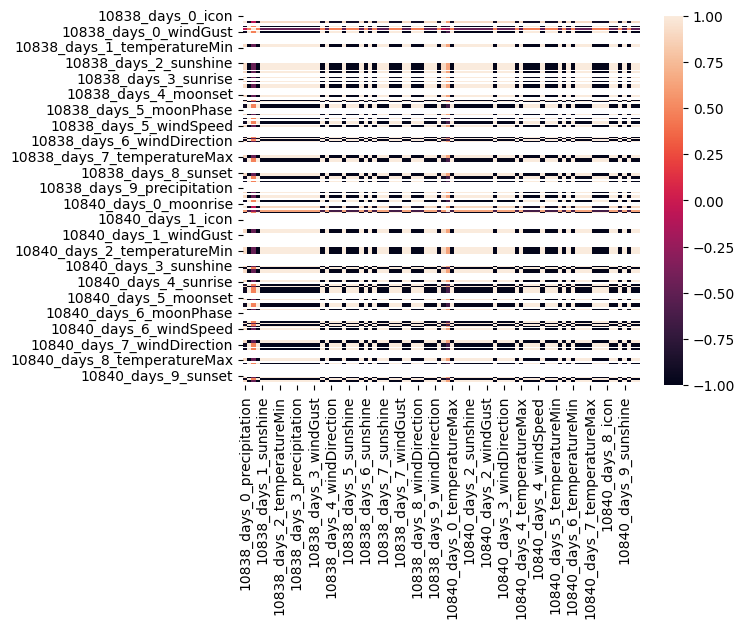

In [7]:
all_nan_columns = corr_matrix.columns[corr_matrix.isna().all()]
df_without_all_nan = corr_matrix.drop(columns=all_nan_columns)
display(sns.heatmap(df_without_all_nan))

In [8]:
display(dataframe[all_nan_columns])
display(dataframe.drop(columns=all_nan_columns))
print(all_nan_columns)

,10838_days_0_icon,10838_days_0_moonPhase,10838_days_0_moonrise,10838_days_0_moonset,10838_days_0_sunrise,10838_days_0_sunset,10838_days_0_temperatureMax,10838_days_0_windDirection,10838_days_0_windSpeed,10838_days_1_icon,...,10840_days_8_windSpeed,10840_days_9_icon,10840_days_9_moonPhase,10840_days_9_moonrise,10840_days_9_moonset,10840_days_9_precipitation,10840_days_9_sunrise,10840_days_9_sunset,10840_days_9_windGust,10840_days_9_windSpeed
0,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
1,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
2,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
3,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
4,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
2875,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
2876,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
2877,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0


,10838_days_0_precipitation,10838_days_0_sunshine,10838_days_0_temperatureMin,10838_days_0_windGust,10838_days_1_sunshine,10838_days_1_temperatureMax,10838_days_2_sunshine,10838_days_2_temperatureMax,10838_days_2_temperatureMin,10838_days_2_windDirection,...,10840_days_7_windDirection,10840_days_7_windGust,10840_days_8_icon,10840_days_8_sunshine,10840_days_8_temperatureMax,10840_days_8_windDirection,10840_days_9_sunshine,10840_days_9_temperatureMax,10840_days_9_temperatureMin,10840_days_9_windDirection
0,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
1,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
2,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
3,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
4,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,65.0,4580.0,173.0,204.0,8240.0,259.0,7870.0,304.0,126.0,2130.0,...,2520.0,278.0,2.0,4630.0,242.0,2460.0,4480.0,245.0,156.0,2450.0
2875,65.0,4580.0,173.0,204.0,8240.0,259.0,7870.0,304.0,126.0,2130.0,...,2520.0,278.0,2.0,4630.0,242.0,2460.0,4480.0,245.0,156.0,2450.0
2876,65.0,4580.0,173.0,204.0,8240.0,259.0,7870.0,304.0,126.0,2130.0,...,2520.0,278.0,2.0,4630.0,242.0,2460.0,4480.0,245.0,156.0,2450.0
2877,65.0,4580.0,173.0,204.0,8240.0,259.0,7870.0,304.0,126.0,2130.0,...,2520.0,278.0,2.0,4630.0,242.0,2460.0,4480.0,245.0,156.0,2450.0


Index(['10838_days_0_icon', '10838_days_0_moonPhase', '10838_days_0_moonrise',
       '10838_days_0_moonset', '10838_days_0_sunrise', '10838_days_0_sunset',
       '10838_days_0_temperatureMax', '10838_days_0_windDirection',
       '10838_days_0_windSpeed', '10838_days_1_icon',
       ...
       '10840_days_8_windSpeed', '10840_days_9_icon', '10840_days_9_moonPhase',
       '10840_days_9_moonrise', '10840_days_9_moonset',
       '10840_days_9_precipitation', '10840_days_9_sunrise',
       '10840_days_9_sunset', '10840_days_9_windGust',
       '10840_days_9_windSpeed'],
      dtype='object', length=168)



Columns that only have one unique value:
Index(['10838_days_0_icon', '10838_days_0_moonPhase', '10838_days_0_moonrise',
       '10838_days_0_moonset', '10838_days_0_sunrise', '10838_days_0_sunset',
       '10838_days_0_temperatureMax', '10838_days_0_windDirection',
       '10838_days_0_windSpeed', '10838_days_1_icon',
       ...
       '10840_days_8_windSpeed', '10840_days_9_icon', '10840_days_9_moonPhase',
       '10840_days_9_moonrise', '10840_days_9_moonset',
       '10840_days_9_precipitation', '10840_days_9_sunrise',
       '10840_days_9_sunset', '10840_days_9_windGust',
       '10840_days_9_windSpeed'],
      dtype='object', length=168)


,10838_days_0_icon,10838_days_0_moonPhase,10838_days_0_moonrise,10838_days_0_moonset,10838_days_0_sunrise,10838_days_0_sunset,10838_days_0_temperatureMax,10838_days_0_windDirection,10838_days_0_windSpeed,10838_days_1_icon,...,10840_days_8_windSpeed,10840_days_9_icon,10840_days_9_moonPhase,10840_days_9_moonrise,10840_days_9_moonset,10840_days_9_precipitation,10840_days_9_sunrise,10840_days_9_sunset,10840_days_9_windGust,10840_days_9_windSpeed
0,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
1,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
2,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
3,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
4,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
2875,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
2876,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0
2877,2.0,6.0,1.722205e+12,1.722171e+12,1.722139e+12,1.722193e+12,229.0,3210.0,93.0,1.0,...,130.0,2.0,0.0,1.722923e+12,1.722974e+12,0.0,1.722917e+12,1.722970e+12,278.0,111.0


,10838_days_0_precipitation,10838_days_0_sunshine,10838_days_0_temperatureMin,10838_days_0_windGust,10838_days_1_sunshine,10838_days_1_temperatureMax,10838_days_2_sunshine,10838_days_2_temperatureMax,10838_days_2_temperatureMin,10838_days_2_windDirection,...,10840_days_7_windDirection,10840_days_7_windGust,10840_days_8_icon,10840_days_8_sunshine,10840_days_8_temperatureMax,10840_days_8_windDirection,10840_days_9_sunshine,10840_days_9_temperatureMax,10840_days_9_temperatureMin,10840_days_9_windDirection
0,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
1,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
2,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
3,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
4,59.0,4610.0,174.0,241.0,8200.0,255.0,7590.0,303.0,123.0,2110.0,...,2580.0,296.0,3.0,4360.0,236.0,2470.0,4280.0,246.0,154.0,2380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,65.0,4580.0,173.0,204.0,8240.0,259.0,7870.0,304.0,126.0,2130.0,...,2520.0,278.0,2.0,4630.0,242.0,2460.0,4480.0,245.0,156.0,2450.0
2875,65.0,4580.0,173.0,204.0,8240.0,259.0,7870.0,304.0,126.0,2130.0,...,2520.0,278.0,2.0,4630.0,242.0,2460.0,4480.0,245.0,156.0,2450.0
2876,65.0,4580.0,173.0,204.0,8240.0,259.0,7870.0,304.0,126.0,2130.0,...,2520.0,278.0,2.0,4630.0,242.0,2460.0,4480.0,245.0,156.0,2450.0
2877,65.0,4580.0,173.0,204.0,8240.0,259.0,7870.0,304.0,126.0,2130.0,...,2520.0,278.0,2.0,4630.0,242.0,2460.0,4480.0,245.0,156.0,2450.0


<Axes: >

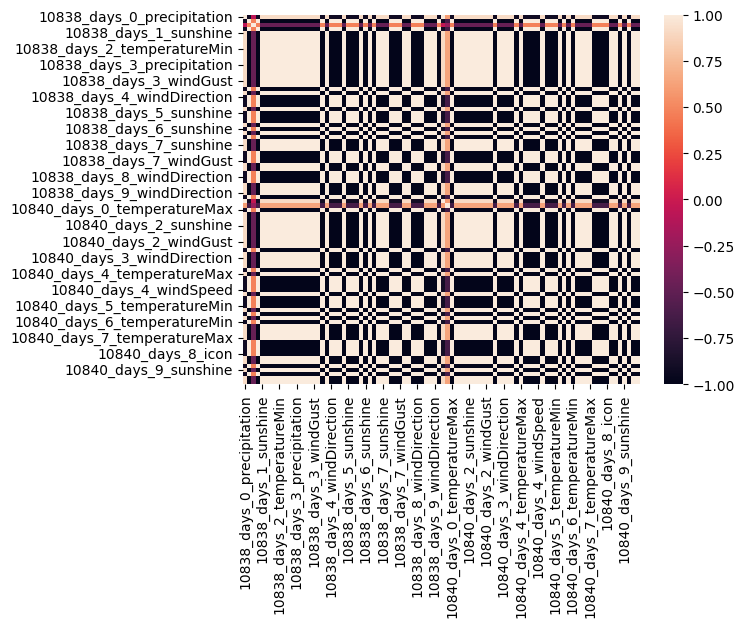

In [9]:
# Identify columns with only one unique value (excluding NaN)
one_value_columns = dataframe.columns[dataframe.nunique(dropna=True) == 1]
print("\nColumns that only have one unique value:")
print(one_value_columns)
display(dataframe[one_value_columns])
display(dataframe.drop(columns=one_value_columns))
display(sns.heatmap(dataframe.drop(columns=one_value_columns).corr()))